### Load all necessary packages

In [1]:
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages

from rpy2.robjects import numpy2ri, pandas2ri

import rpy2.ipython.html
rpy2.ipython.html.init_printing()

import rpy2.robjects.lib.ggplot2 as gp
from rpy2.ipython.ggplot import image_png

from rpy2.rinterface_lib import openrlib

robjects.r('''

library(MetENP)

''')
;

''

In [3]:
from rpy2.robjects.packages import importr
metenp = importr('MetENP')

### Start data processing

### Gets metabolomics data, metadata and metabolite info from Metabolomics Workbench using REST service

In [4]:
data_1 = robjects.r['getmwstudies']('ST000915', 
    'data'
)

In [5]:
with openrlib.rlock:
    
    robjects.r.assign('data_1', data_1)
    
    robjects.r('''

    data_1_print = data.frame(apply(data_1, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
    head(data_1_print)

    ''')
    
    pass

### Gets metabolomics data, metadata and metabolite info from Metabolomics Workbench using REST service

In [6]:
metadata = robjects.r['getmwstudies']('ST000915', 
    'factors'
)

In [7]:
robjects.r.assign('metadata', metadata)

robjects.r('''
metadata_print = data.frame(apply(metadata, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
head(metadata_print)
''')

,,study_id,local_sample_id,subject_type,factors,Diagnosis
0,1,ST000915,NASH005,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
1,2,ST000915,NASH007,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
2,3,ST000915,NASH009,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
3,4,ST000915,NASH013,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
4,5,ST000915,NASH016,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
5,6,ST000915,NASH022,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis


### Associate metabolomics data to the refmet class

In [8]:
refmet_class = robjects.r['convert_refmet'](data_1)

robjects.r.assign('refmet_class', refmet_class)

robjects.r('''

refmet_class_print = data.frame(apply(refmet_class, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
head(refmet_class_print)

''')

,,metabolite_name,analysis_id,analysis_summary,metabolite_id,...,main_class,sub_class
0,1,"1,2-DG(30:0)",AN001488,Core E Neutral Lipids,ME231190,...,Diradylglycerols,DAG
1,2,"1,2-DG(30:1)",AN001488,Core E Neutral Lipids,ME231189,...,Diradylglycerols,DAG
2,3,"1,2-DG(32:0)",AN001488,Core E Neutral Lipids,ME231196,...,Diradylglycerols,DAG
3,4,"1,2-DG(32:1)",AN001488,Core E Neutral Lipids,ME231195,...,Diradylglycerols,DAG
4,5,"1,2-DG(32:2)",AN001488,Core E Neutral Lipids,ME231194,...,Diradylglycerols,DAG
5,6,"1,2-DG(32:3)",AN001488,Core E Neutral Lipids,ME231193,...,Diradylglycerols,DAG


### This lists each unique metadata factor/independent variable

In [9]:
robjects.r('''
data.frame(unique(metadata_print$factors))
''')

,,unique.metadata_print.factors.
0,1,Diagnosis:Cirrhosis
1,2,Diagnosis:NASH
2,3,Diagnosis:Normal
3,4,Diagnosis:Steatosis


### This lists each different analysis terms

In [10]:
robjects.r('''
data.frame(unique(data_1_print$analysis_summary))
''')

,,unique.data_1_print.analysis_summary.
0,1,Core G Fatty acids/Eicosanoids
1,2,Core J Sterols
2,3,Core K Prenols/Cardiolipins
3,4,Core E Neutral Lipids
4,5,Core I Sphingolipids
5,6,Core H Phospholipids


### Here, find significant metabolites and the significance of all the analysis summary together. The analysis summary/modes you got in the previous section

In [11]:
robjects.r.assign('refmet_class', refmet_class)
robjects.r.assign('metcol', 'metabolite_name')
robjects.r.assign('fac1', 'Cirrhosis')
robjects.r.assign('fac2', 'Normal')
robjects.r.assign('faccol', 'Diagnosis')
robjects.r.assign('samcol', 'local_sample_id')
robjects.r.assign('normtype', ['50percent'])
robjects.r.assign('pthres', ['0.05'])
robjects.r.assign('thres_log2foldchangevar', '0.5')
robjects.r.assign('padj', ['fdr'])

0,"[1] ""fdr"""


In [12]:
robjects.r('''
ptreshnum<-as.numeric(pthres)
thres_log2foldchangenum<-as.numeric(thres_log2foldchangevar)
padjchar<-as.character(padj[1])
''')
;

''

In [13]:
robjects.r.assign('mettit', 'Core G Fatty acids/Eicosanoids, Core J Sterols, Core K Prenols/Cardiolipins, Core E Neutral Lipids, Core I Sphingolipids, Core H Phospholipids')
robjects.r('''
list_mettit <- strsplit(mettit, ',')
list_mettit = unlist(list_mettit, TRUE, TRUE)
titles <- list()
for(elm in list_mettit) {
    elm = trimws(elm)
    titles <- c(titles, elm)
}
''')

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f8b4fea7900> [RTYPES.NILSXP]

### Find the log2fold change and p value on metabolomics data using a t-test. 

In [14]:
robjects.r('''
stats_metabolites = significant_met(metabolomics_data=refmet_class_print, met_col=metcol,analysis_type=c(titles), metadata=metadata, factor1=fac1, factor2=fac2, factor_col=faccol,sample_col=samcol, p_adjust=padjchar,normalization=normtype)
''')
;

''

In [15]:
robjects.r('''
sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= ptreshnum&abs(stats_metabolites[,"log2Fold_change"])>thres_log2foldchangenum),]
''')
;

''

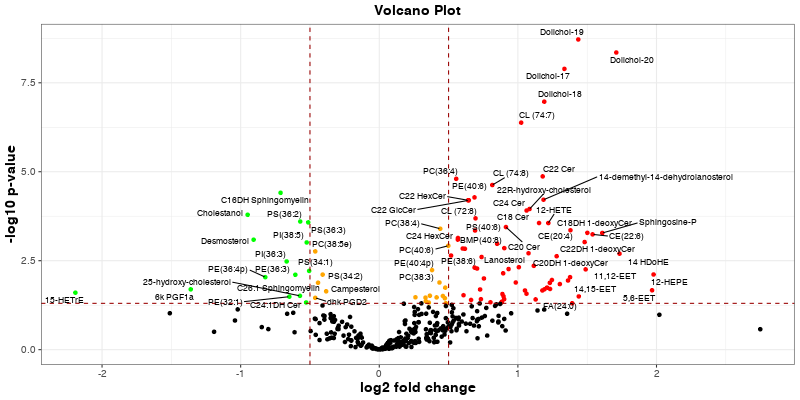

In [16]:
image_png(robjects.r('''
plot_volcano(stats_metabolites, thres_pval= ptreshnum, thres_log2foldchange = thres_log2foldchangenum, TRUE)
'''))

Each color describes a different metabolite group.

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles, and KEGG (if you chose to add in KEGG).

In [17]:
with openrlib.rlock:
    robjects.r('''
    sig_metabolites_kegg_id= map_keggid(sig_metabolites)
    ''')
    pass

#### Check all your significant metabolites have not been assigned metabolite class
Outcome should be 0 elements.

In [18]:
robjects.r('''
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)
''')

<rpy2.robjects.vectors.StrVector object at 0x7f8b53f33100> [RTYPES.STRSXP]
R classes: ('character',)
[]

### Count the number of metabolites in each of the metabolite classes and plot them with a bar graph

In [19]:
robjects.r.assign('classtype', ['sub_class'])
robjects.r('''
metclassvar <- as.character(classtype[1])
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass=metclassvar, plotting=TRUE, thres_logfC = 0.5)
''')

0,sig_met_count,...
1,plotimg,


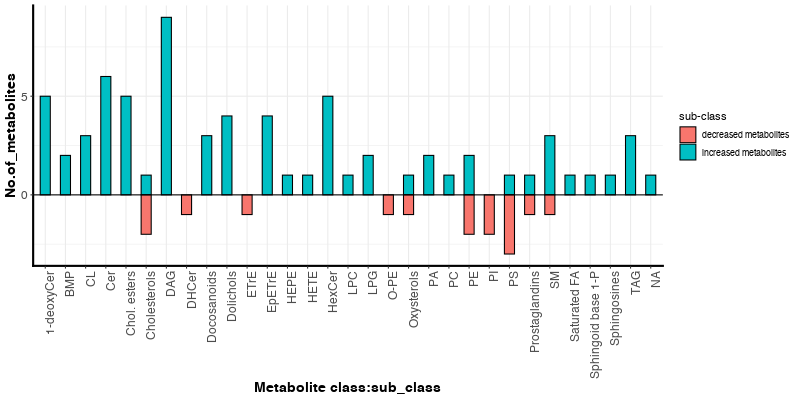

In [20]:
image_png(robjects.r('''
count_changes$plotimg
'''))

### Enrichment class score

Calculate the enrichment score of each metabolite class. 

Enrichment score is calculated through the hypergeometric method.

In [21]:
robjects.r.assign('sigmets', 3)

3


In [22]:
robjects.r('''
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass=metclassvar,enrich_stats="HG",no=sigmets)
''')
;

''

## Plot the enrichment score via function plot_met_enrichment

### If no figure shows here, or an error returns, this means no classes had enough significant metabolites. Decrease the significant metabolites per class and rerun the program.

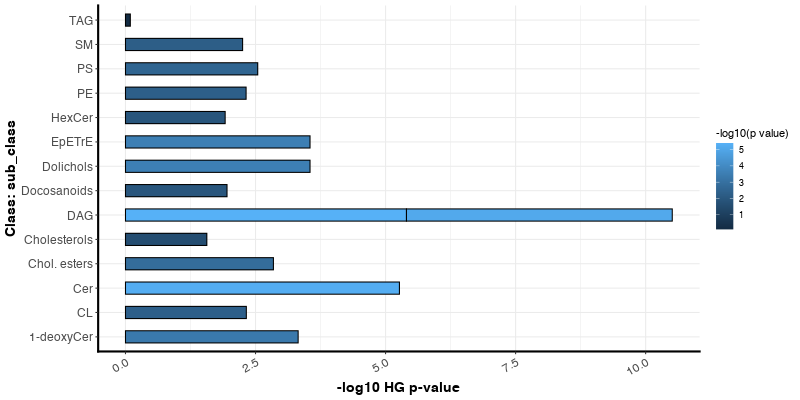

In [23]:
image_png(robjects.r('''
plot_met_enrichment(metenrichment, metclassvar,"HG", no=sigmets)
'''))

### Check the pathways with reactions of all the significant metabolites

In [24]:
robjects.r.assign('studyOrg', 'hsa')
robjects.r('''
met_path = met_pathways(df_metenrichment = metenrichment, studyOrg)
head(met_path)
''')

,,rxn,refmet_name,Exact mass,KEGG ID,...,pathway_id,sps_path_id
0,1,R01003,Dolichol-20,1381.2782,C00381,...,rn00510,hsa00510
1,2,R01003,Dolichol-20,1381.2782,C00381,...,rn01100,hsa01100
2,3,R01018,Dolichol-20,1381.2782,C00381,...,rn00510,hsa00510
3,4,R01018,Dolichol-20,1381.2782,C00381,...,rn01100,hsa01100
4,5,R01312,"1,2-DG 36:2",620.5380,C00641,...,rn00564,hsa00564
5,6,R01312,"1,2-DG 36:1",622.5536,C00641,...,rn00564,hsa00564


### Get pathway enrichment sore.

Once we have the pathway information, we can calculate enrichment score of pathways using the hypergeometric scores for each pathway.

For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways. 
N = total no. of cmpds linked to kegg pathway 

L = No. of cmpds in a pathway
M= no. of altered cmpds in a pathway
K =  total no. of altered cmpds
phyper(M,L, N-L, K)


This function also utilizes korg dataset from pathview package.

In [25]:
robjects.r.assign('keggTF', ['FALSE'])
robjects.r('''
keggTFchar<-as.character(keggTF[1])
''')

FALSE


In [26]:
korgvar = "/Users/Callie/Documents/199/MetENP/vignettes/static/korg.RData"
ls_pathvar = "/Users/Callie/Documents/199/MetENP/vignettes/static/ls_path.RData"
robjects.r.assign('korgvar', korgvar)
robjects.r.assign('ls_pathvar', ls_pathvar)

/Users/Callie/Documents/199/MetENP/vignettes/static/ls_path.RData


In [27]:
robjects.r('''
load(korgvar)
load(ls_pathvar)
''')

ls_path


In [28]:
robjects.r('''
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps=studyOrg,padj=padjchar, kegg_comp_path=keggTFchar)
head(kegg_es)
''')

,,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
0,1,Arachidonic acid metabolism,4,75,0.999173034565787,0.999173034565787
1,2,Glycerolipid metabolism,12,38,0.008469408188587033,0.02117352047146758
2,3,Glycerophospholipid metabolism,17,55,0.0020583330651215456,0.006861110217071819
3,4,"Glycine, serine and threonine metabolism",4,50,0.9705818848647176,0.999173034565787
4,5,Glycosylphosphatidylinositol (GPI)-anchor biosynthesis,13,19,1.8377122608709652e-07,9.188561304354826e-07
5,6,Inositol phosphate metabolism,9,47,0.3070207366874475,0.4386010524106393


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

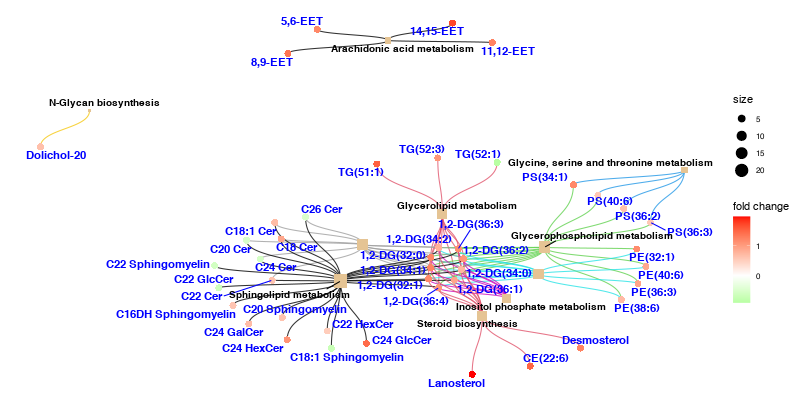

In [29]:
image_png(robjects.r('''
plot_pathway_networks (met_path,kegg_es, TRUE)
'''))

### Heatmap

In [30]:
robjects.r.assign('x_size_heat', 8)
robjects.r.assign('y_size_heat', 6)

6


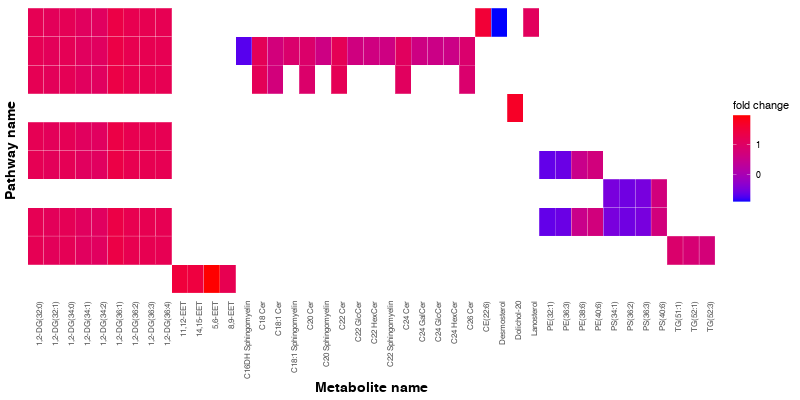

In [31]:
image_png(robjects.r('''
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=x_size_heat, yaxis=y_size_heat)
'''))

### Dotplot

In [32]:
robjects.r.assign('x_size_dot', 8)
robjects.r.assign('y_size_dot', 6)

6


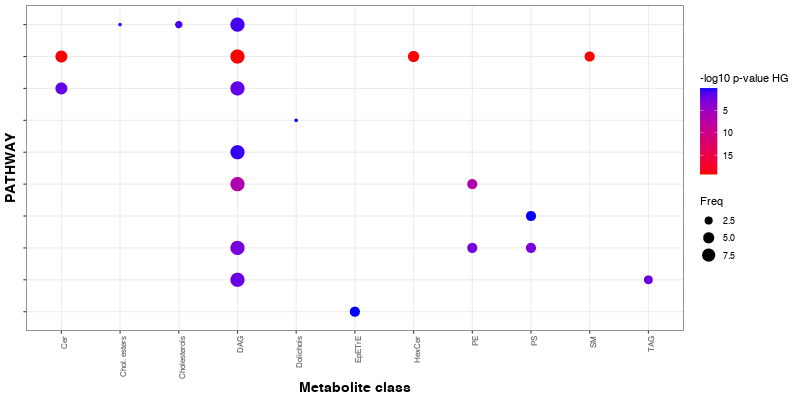

In [33]:
image_png(robjects.r('''
dotplot_met_class_path (met_path, kegg_es, metclassvar,xaxis=x_size_dot,yaxis=y_size_dot)
'''))

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [34]:
robjects.r('''
met_gene_info = enzyme_gene_info (metenrichment, studyOrg, metclassvar)
head(met_gene_info)
''')

,,orthology_id,ORTHOLOGY,gene_id,gene_name,...,EQUATION_more,ENZYME
0,1,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
1,2,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
2,3,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
3,4,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
4,5,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""6646""","[1] ""SOAT1, ACACT, ACAT, ACAT-1, ACAT1, SOAT, STAT""",...,"[1] ""Acyl-CoA + Cholesterol <=> CoA + Cholesterol ester""","[1] ""2.3.1.26"""
5,6,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""8435""","[1] ""SOAT2, ACACT2, ACAT2, ARGP2""",...,"[1] ""Acyl-CoA + Cholesterol <=> CoA + Cholesterol ester""","[1] ""2.3.1.26"""


#### Get the information if metabolite is a reactant or substrate

In [35]:
robjects.r('''
rclass_info = react_substrate(met_gene_info)
head(rclass_info)
''')

,,orthology_id,ORTHOLOGY,gene_id,gene_name,...,ENZYME,reactant_product
0,1,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
1,2,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
2,3,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
3,4,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
4,5,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""6646""","[1] ""SOAT1, ACACT, ACAT, ACAT-1, ACAT1, SOAT, STAT""",...,"[1] ""2.3.1.26""",Product
5,6,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""8435""","[1] ""SOAT2, ACACT2, ACAT2, ARGP2""",...,"[1] ""2.3.1.26""",Product


#### Get gene info in short form

In [36]:
robjects.r('''
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']
''')

,,Metabolite,orthology_id,ORTHOLOGY,gene_id,...,ENZYME,reactant_product
0,1,PE(32:1),"K00551, K00993, K01047, K01115, K01613, K05285, K05287, K05288, K05310, K08730, K13512, K13515, K13517, K13644, K14621, K16342, K16343, K16817, K16860","phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71], ethanolaminephosphotransferase [EC:2.7.8.1], secretory phospholipase A2 [EC:3.1.1.4], phospholipase D1/2 [EC:3.1.4.4], phosphatidylserine decarboxylase [EC:4.1.1.65], GPI ethanolamine phosphate transferase 1 [EC:2.7.-.-], GPI ethanolamine phosphate transferase 2/3 subunit F, GPI ethanolamine phosphate transferase 3 subunit O [EC:2.7.-.-], ethanolamine phosphate transferase 2 subunit G [EC:2.7.-.-], phosphatidylserine synthase 2 [EC:2.7.8.29], lysophospholipid acyltransferase [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 5 [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 1/2 [EC:2.3.1.51 2.3.1.-], choline/ethanolamine phosphotransferase [EC:2.7.8.1 2.7.8.2], phospholipase B1, membrane-associated [EC:3.1.1.4 3.1.1.5], cytosolic phospholipase A2 [EC:3.1.1.4], calcium-independent phospholipase A2 [EC:3.1.1.4], HRAS-like suppressor 3 [EC:3.1.1.32 3.1.1.4], phospholipase D3/4 [EC:3.1.4.4]","10400, 85465, 26279, 30814, 391013, 50487, 5319, 5320, 5322, 64600, 81579, 8399, 84647, 5337, 5338, 23761, 23556, 5281, 84720, 54872, 81490, 254531, 10162, 129642, 154141, 10390, 151056, 100137049, 123745, 255189, 283748, 5321, 8605, 8681, 8398, 11145, 122618, 23646",...,"2.1.1.17, 2.7.8.1, 3.1.1.4, 3.1.4.4, 4.1.1.65, 2.7.-.-, NULL, 2.7.8.29, 2.3.1.23, 3.1.1.32","Substrate, Product"
1,2,PE(36:3),"K00551, K00993, K01047, K01115, K01613, K05285, K05287, K05288, K05310, K08730, K13512, K13515, K13517, K13644, K14621, K16342, K16343, K16817, K16860","phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71], ethanolaminephosphotransferase [EC:2.7.8.1], secretory phospholipase A2 [EC:3.1.1.4], phospholipase D1/2 [EC:3.1.4.4], phosphatidylserine decarboxylase [EC:4.1.1.65], GPI ethanolamine phosphate transferase 1 [EC:2.7.-.-], GPI ethanolamine phosphate transferase 2/3 subunit F, GPI ethanolamine phosphate transferase 3 subunit O [EC:2.7.-.-], ethanolamine phosphate transferase 2 subunit G [EC:2.7.-.-], phosphatidylserine synthase 2 [EC:2.7.8.29], lysophospholipid acyltransferase [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 5 [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 1/2 [EC:2.3.1.51 2.3.1.-], choline/ethanolamine phosphotransferase [EC:2.7.8.1 2.7.8.2], phospholipase B1, membrane-associated [EC:3.1.1.4 3.1.1.5], cytosolic phospholipase A2 [EC:3.1.1.4], calcium-independent phospholipase A2 [EC:3.1.1.4], HRAS-like suppressor 3 [EC:3.1.1.32 3.1.1.4], phospholipase D3/4 [EC:3.1.4.4]","10400, 85465, 26279, 30814, 391013, 50487, 5319, 5320, 5322, 64600, 81579, 8399, 84647, 5337, 5338, 23761, 23556, 5281, 84720, 54872, 81490, 254531, 10162, 129642, 154141, 10390, 151056, 100137049, 123745, 255189, 283748, 5321, 8605, 8681, 8398, 11145, 122618, 23646",...,"2.1.1.17, 2.7.8.1, 3.1.1.4, 3.1.4.4, 4.1.1.65, 2.7.-.-, NULL, 2.7.8.29, 2.3.1.23, 3.1.1.32","Substrate, Product"
2,3,PE(38:6),"K00551, K00993, K01047, K01115, K01613, K05285, K05287, K05288, K05310, K08730, K13512, K13515, K13517, K13644, K14621, K16342, K16343, K16817, K16860","phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71], ethanolaminephosphotransferase [EC:2.7.8.1], secretory phospholipase A2 [EC:3.1.1.4], phospholipase D1/2 [EC:3.1.4.4], phosphatidylserine decarboxylase [EC:4.1.1.65], GPI ethanolamine phosphate transferase 1 [EC:2.7.-.-], GPI ethanolamine phosphate transferase 2/3 subunit F, GPI ethanolamine phosphate transferase 3 subunit O [EC:2.7.-.-], ethanolamine phosphate transferase 2 subunit G [EC:2.7.-.-], phosphatidylserine synthase 2 [EC:2.7.8.29], lysophospholipid acyltransferase [EC:2.3.1.23 2.3.1.-], lysophospholi